برنامه ای بنویسید که در یک جمعیت (مثلا تیم والیبال) چهره یک فرد را که در آن جمعیت هست پیدا کرده و دورش مستطیل بکشد

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
detector = cv2.FaceDetectorYN.create(
    "model/face_detection_yunet_2023mar.onnx",
    "",
    (320, 320),
    0.8,
    0.3,
    5000
)

In [29]:
person_image = cv2.imread("Images/amiri.jpg")
height, width, _ = person_image.shape

# Set input size before inference
detector.setInputSize((width, height))
#
result1 = detector.detect(person_image)

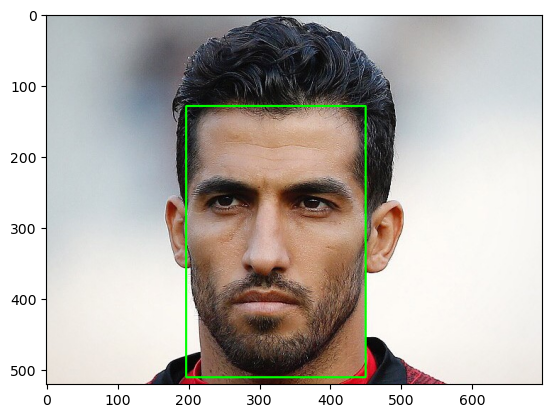

In [31]:
if result1[1] is not None:
    for idx, face in enumerate(result1[1]):
        coords = face[:-1].astype(np.int32)
        cv2.rectangle(person_image, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), 2)
plt.imshow(person_image[...,::-1])

In [37]:
team_image = cv2.imread("Images/perspolis.jpg")
height, width, _ = team_image.shape

# Set input size before inference
detector.setInputSize((width, height))
#
result2 = detector.detect(team_image)

In [39]:
recognizer = cv2.FaceRecognizerSF.create(
"model/face_recognition_sface_2021dec.onnx","")
#download model from https://github.com/opencv/opencv_zoo/tree/main/models/face_recognition_sface

face1_align = recognizer.alignCrop(person_image, result1[1][0])
face1_feature = recognizer.feature(face1_align)

In [41]:
l2_similarity_threshold = 1.128

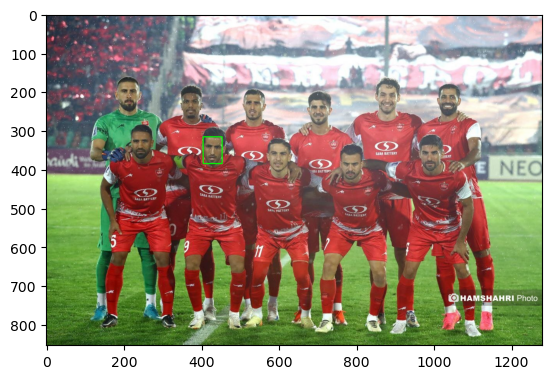

In [43]:
if result2[1] is not None:
    for idx, face in enumerate(result2[1]):
        coords = face[:-1].astype(np.int32)
        face2_align = recognizer.alignCrop(team_image,face)
        face2_feature = recognizer.feature(face2_align)
        l2_score = recognizer.match(face1_feature, face2_feature, cv2.FaceRecognizerSF_FR_NORM_L2)
        if l2_score <= l2_similarity_threshold:
            cv2.rectangle(team_image, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), 2)
plt.imshow(team_image[...,::-1])